In [23]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import random

# Set a default color palette to colorblind
sns.set_palette("colorblind")
sns.set_style(style="whitegrid")

In [24]:
# Read csv into python

fire_df = pd.read_csv('White goods fires from 2009.csv')

In [25]:
# Explore data types

fire_df.dtypes

Year                           int64
Month                         object
IncType                       object
ParentPropertyType            object
NumFireDeaths                  int64
NumAllFireInjuries             int64
IncGeo_BoroughCode            object
IncGeo_BoroughName            object
IncGeo_WardCode               object
IncGeo_WardName               object
IgnitionSourcePower           object
IgnitionSource                object
ItemFirstIgnited              object
LocationFireStarted           object
ApplianceManufacturer         object
ApplianceManufacturerOther    object
MainCauseModel                object
dtype: object

In [26]:
# First 5 rows of dataset

fire_df.head(5)

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,ApplianceManufacturerOther,MainCauseModel
0,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000033,Westminster,E05013807,Vincent Square,Electricity,Washing machine,Wiring insulation,Kitchen,HOOVER,NaN,Quattro AS110
1,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013654,Camden Square,Electricity,Washing machine,Plastic - raw material only,Kitchen,CANDY,NaN,Aquaviva 120T
2,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,1,E09000016,Havering,E05013969,Elm Park,Electricity,Fridge/Freezer,Plastic - raw material only,Corridor/Hall,BEJAM,NaN,Fridge Freezer model not known
3,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000022,Lambeth,E05014113,Streatham Hill East,Electricity,Tumble dryer - Standard,Other textiles,Kitchen,NaN,NaN,NaN
4,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013660,Haverstock,Electricity,Fridge/Freezer,Other item,Kitchen,BOSCH,NaN,ClassicXX


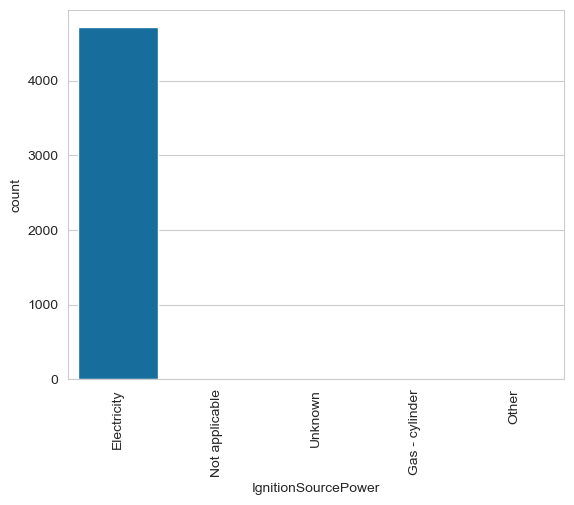

In [27]:
# Plot of the ignition source 

sns.countplot(data=fire_df, x='IgnitionSourcePower')
plt.xticks(rotation=90)
plt.show()


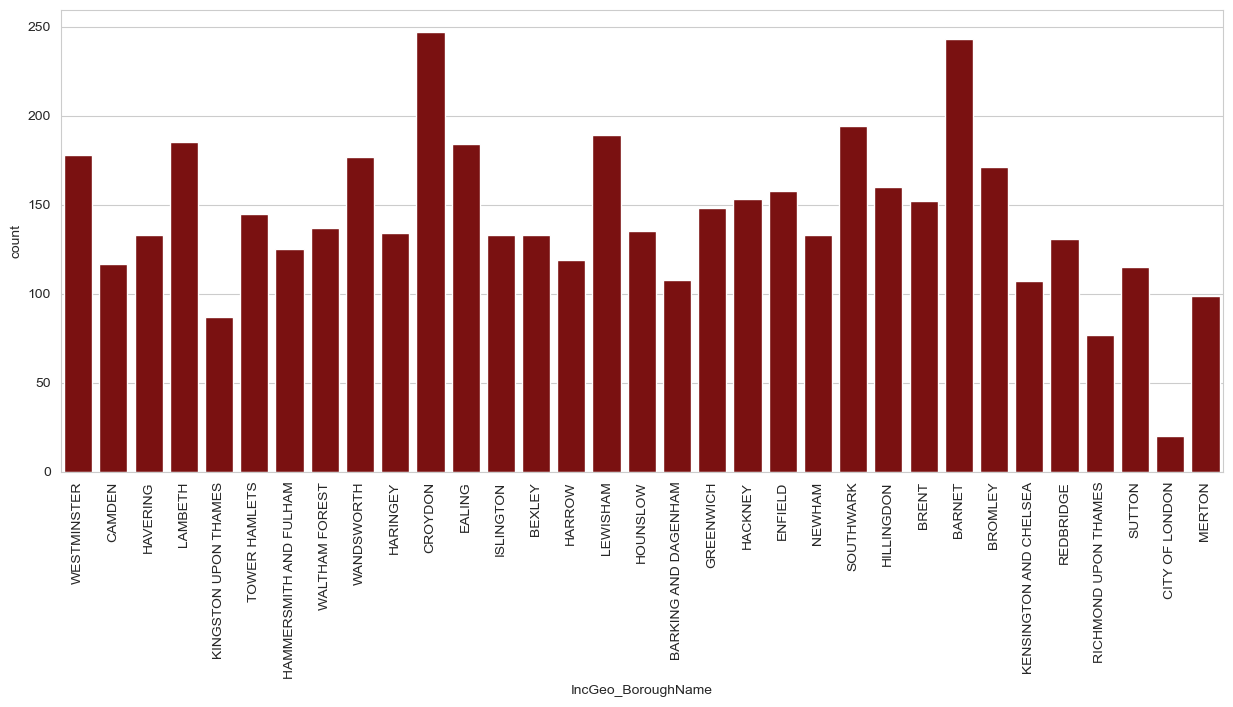

In [28]:
# Clean the bourough names to be all upper case

fire_df['IncGeo_BoroughName']=fire_df['IncGeo_BoroughName'].apply(lambda x: x.upper())

# Plot the number of entries in each borough

plt.figure(figsize=(15, 6))
sns.countplot(data=fire_df, x='IncGeo_BoroughName',color='darkred')
plt.xticks(rotation=90)
plt.show()


In [29]:
# Look for null/Nan values

fire_df.isnull().sum()

Year                             0
Month                            0
IncType                          0
ParentPropertyType               0
NumFireDeaths                    0
NumAllFireInjuries               0
IncGeo_BoroughCode               0
IncGeo_BoroughName               0
IncGeo_WardCode                  1
IncGeo_WardName                  1
IgnitionSourcePower              0
IgnitionSource                   0
ItemFirstIgnited               150
LocationFireStarted              0
ApplianceManufacturer          526
ApplianceManufacturerOther    4177
MainCauseModel                 598
dtype: int64

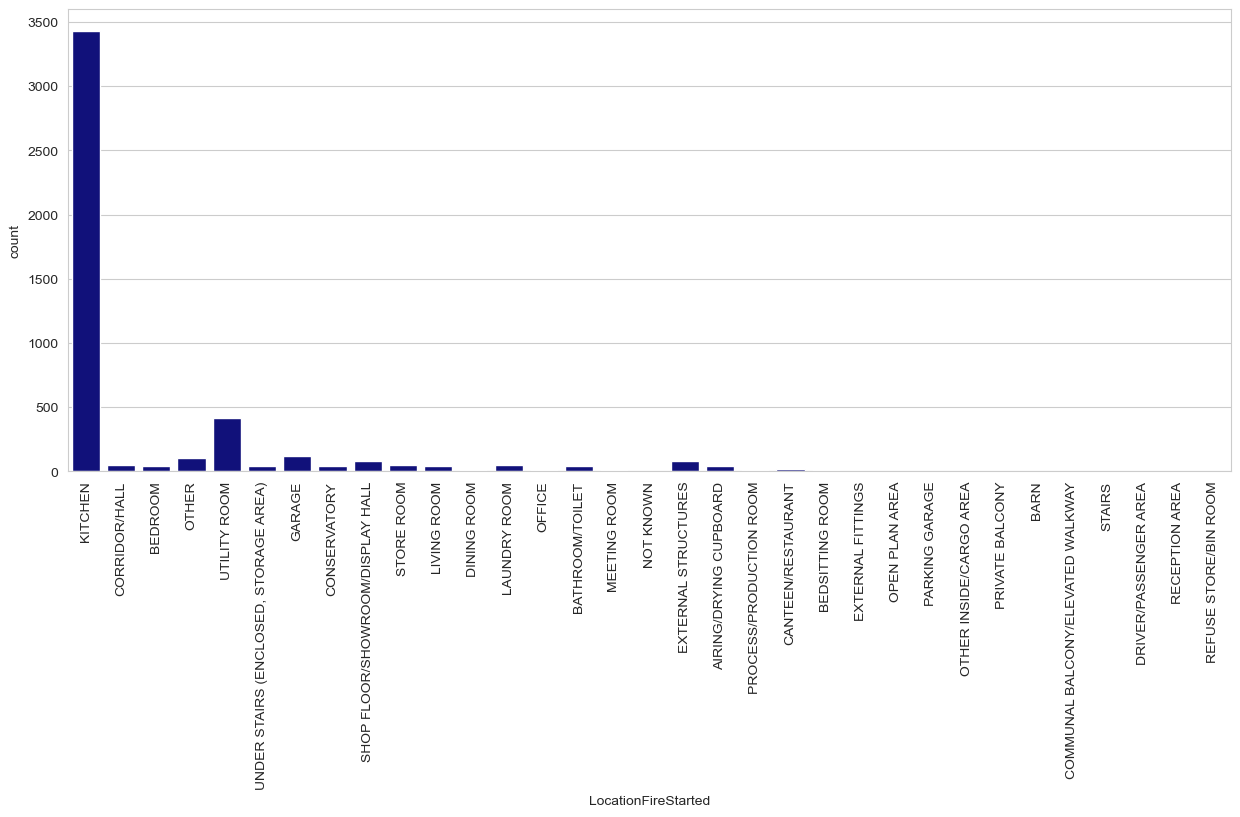

In [30]:
# Plot showing the area fire started in the house/building

fire_df['LocationFireStarted']=fire_df['LocationFireStarted'].apply(lambda x: x.upper())

plt.figure(figsize=(15, 6))
sns.countplot(data=fire_df, x='LocationFireStarted',color='darkblue')
plt.xticks(rotation=90)
plt.show()

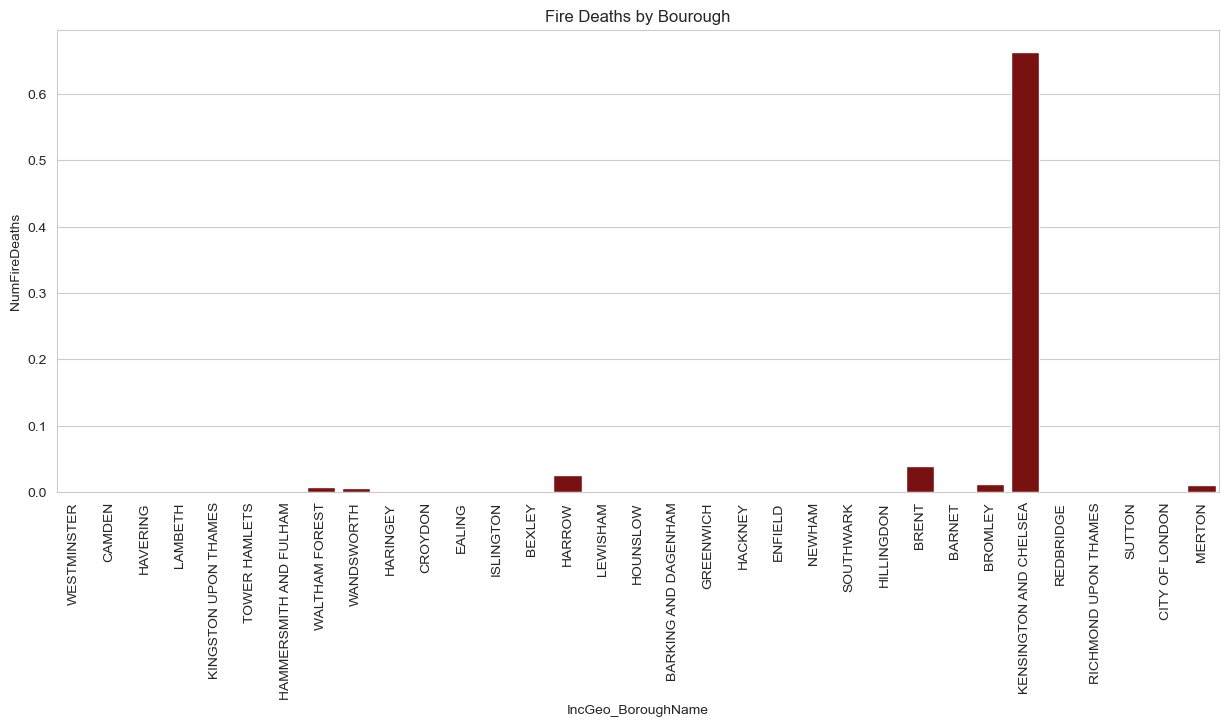

In [55]:
# Plots of bourough by fire death

fire_df['IncGeo_BoroughName']=fire_df['IncGeo_BoroughName'].apply(lambda x: x.upper())

plt.figure(figsize=(15, 6))
sns.barplot(data=fire_df, x='IncGeo_BoroughName', y='NumFireDeaths', color='darkred', errorbar=None)
plt.title("Fire Deaths by Bourough")
plt.xticks(rotation=90)
plt.show()

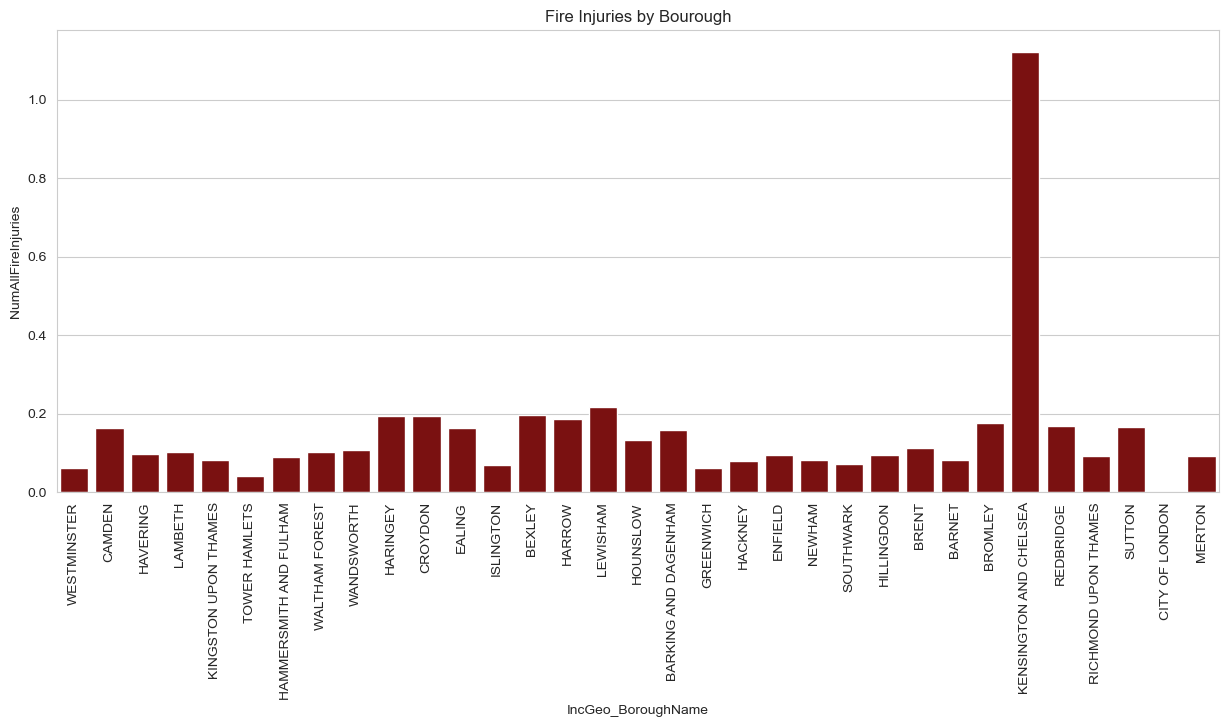

In [56]:
# Plots of bourough by fire injuries

fire_df['IncGeo_BoroughName']=fire_df['IncGeo_BoroughName'].apply(lambda x: x.upper())

plt.figure(figsize=(15, 6))
sns.barplot(data=fire_df, x='IncGeo_BoroughName', y='NumAllFireInjuries', color='darkred', errorbar=None)
plt.title("Fire Injuries by Bourough")
plt.xticks(rotation=90)
plt.show()
# Plots of bourough by fire injuriesplt.show()

### The Grenfell tower disaster is such an extreme value that it will be removed to be able to explore more common data values 

In [33]:
# removing grenfell from the dataset

nonExtreme_fireData = fire_df[fire_df['NumFireDeaths'] < 70]

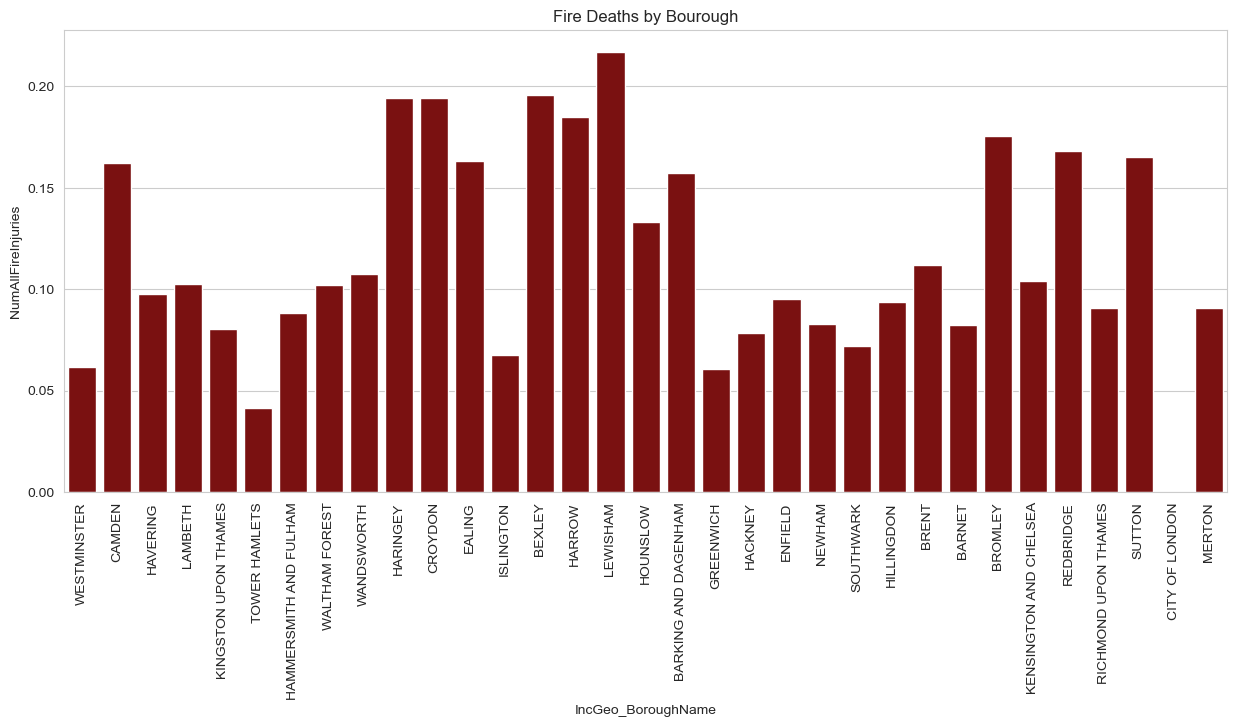

In [57]:
# Plots of bourough by fire injuries

plt.figure(figsize=(15, 6))
sns.barplot(data=nonExtreme_fireData, x='IncGeo_BoroughName', y='NumAllFireInjuries', color='darkred', errorbar=None)
plt.xticks(rotation=90)
plt.title("Fire Deaths by Bourough")
plt.show()

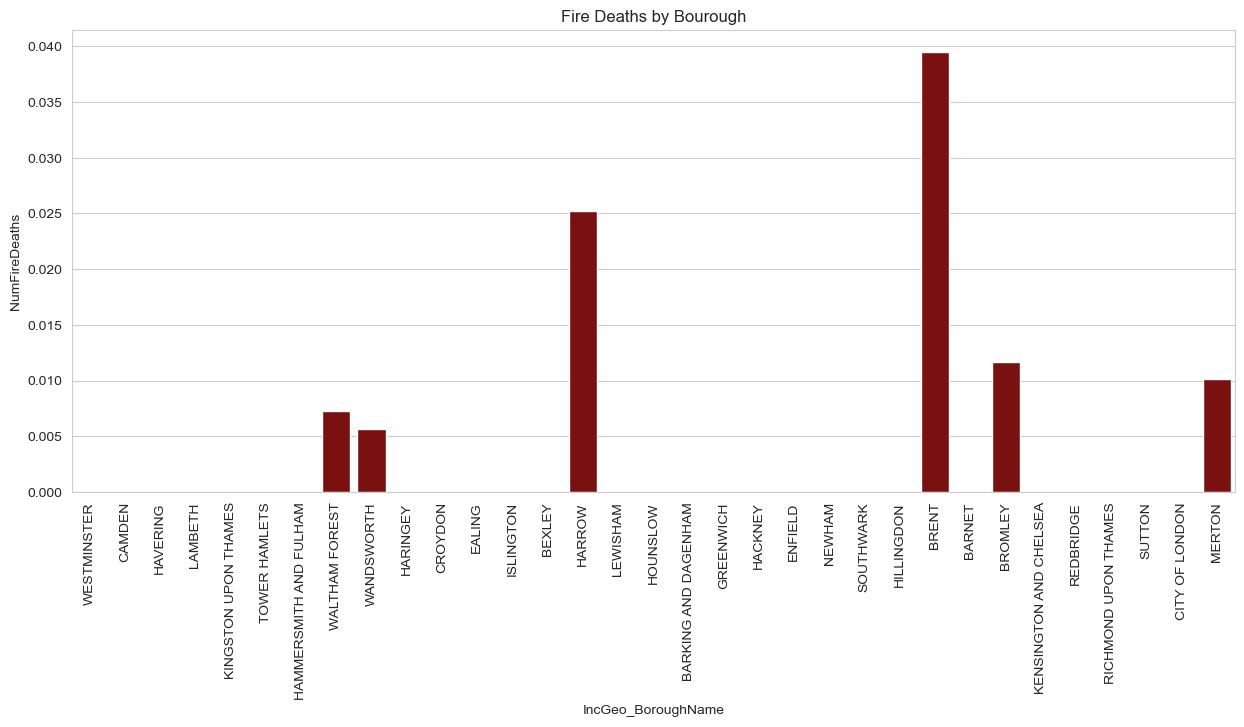

In [59]:
plt.figure(figsize=(15, 6))
sns.barplot(data=nonExtreme_fireData, x='IncGeo_BoroughName', y='NumFireDeaths', color='darkred', errorbar=None)
plt.xticks(rotation=90)
plt.title("Fire Deaths by Bourough")
plt.show()